In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Worksheet_1.ipynb")

# Worksheet 1: Terminology and decision trees

## Imports

In [2]:
# Load necessary libraries
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import re
import sys
from hashlib import sha1
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier

<br><br>

## Instructions

This worksheet is intended to help you revise and reinforce what you've learned in the lecture. You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for worksheets.** The worksheets are fully autograded using the Gradescope's autograder tool, `otter grader`. If you have successfully installed the course environment, you should have `otter grader` in `cpsc330` environment. If not, follow the instructions below.  

- Go to the command line/terminal.
- Activate the course conda environment and install `otter-grader` using the following command.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. Once you are done with the worksheet, follow the instructions below before the submission. 

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Upload the worksheet using Gradescope's drag and drop tool. Make sure to access Gradescope via [Canvas](https://canvas.ubc.ca/courses/123439). Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
3. Make sure that the plots and output are rendered properly in your submitted file.

<br>
<br>

## Exercise 1

### 1.1 Terminology
rubric={autograde}

**Your Task:**
<br>Complete each of the following sentences using the provided machine learning terminologies for the list below. Remember, each term can only be used once!

**List of Terms (in no particular order):**

    a) hyperparameters
    b) training
    c) tree depth
    d) parameters
    e) example/data point
    f) features
    g) target
    h) root node
    i) branch
    j) leaf node
    

1. When working with data, each row or instance, containing both feature values and the corresponding target, is called an  ________.

2. Before delving into modeling, we must specify certain settings that influence the learning process; these are known as ________.

3. After training my model, it acquires values such as which features to focus on and the threshold for splitting them; these are termed _________.

4. In decision trees, the starting point, the initial question we ask, is referred to as the ________.

5. The total number of steps or jumps from the initial question all the way to the final prediction in a decision tree is known as the ________.

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 3

In [3]:
# format your answer like this: terminology = ['x','x','x','x','x']
terminology = None

...

Ellipsis

In [4]:
grader.check("q1.1")

q1.1 results:
    q1.1 - 1 result:
        ❌ Test case failed
        Trying:
            assert len(terminology) == 5, "Please answer all the 4 questions."
        Expecting nothing
        **********************************************************************
        Line 1, in q1.1 0
        Failed example:
            assert len(terminology) == 5, "Please answer all the 4 questions."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.1 0[0]>", line 1, in <module>
                assert len(terminology) == 5, "Please answer all the 4 questions."
            TypeError: object of type 'NoneType' has no len()
        Trying:
            assert sha1(''.join(terminology).encode("utf-8").lower()).hexdigest() == '24ebc14140161ec925b8095832f2be7dfa63beb7', "Your answers do not match the expected solution. Please try again."
        Expecting nothing
        **********************************************************************
        Line 2, in q1.1 0
        Failed example:
            assert sha1(''.join(terminology).encode("utf-8").lower()).hexdigest() == '24ebc14140161ec925b8095832f2be7dfa63beb7', "Your answers do not match the expected solution. Please try again."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1.1 0[1]>", line 1, in <module>
                assert sha1(''.join(terminology).encode("utf-8").lower()).hexdigest() == '24ebc14140161ec925b8095832f2be7dfa63beb7', "Your answers do not match the expected solution. Please try again."
            TypeError: can only join an iterable

<br><br><br><br>

## Exercise 2: Decision trees with a toy dataset

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, whether there is work-hour flexibility, and whether the company is a start-up or not. So the `X` of your offer data looks as follows:

#### Defining the dataset

In [5]:
offer_data = {
    # Features
    "supportive_colleagues": [1, 0, 0, 1],
    "work_hour_flexibility": [0, 0, 1, 1],
    "start_up": [0, 1, 1, 1],    
}

offer_df = pd.DataFrame(offer_data)
offer_df

supportive_colleagues  work_hour_flexibility  start_up
0                      1                      0         0
1                      0                      0         1
2                      0                      1         1
3                      1                      1         1

Your goal is to get predictions for these rows. In other words, for each row, you want to predict whether that job would make you <b>happy</b> or <b>unhappy</b>.

So you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

    1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
    2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
    3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
    4. Are you happy in your job? (happy or unhappy)

Suppose you get the following data from this toy survey. You decide to train a machine learning model using this toy survey data and use this model to predict which job from <b>offer_df</b> is likely to make you happy.


In [6]:
import pandas as pd

happiness_data = {
    # Features
    "supportive_colleagues": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "work_hour_flexibility": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "start_up": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

supportive_colleagues  work_hour_flexibility  start_up   target
0                      1                      1         1    happy
1                      1                      1         0    happy
2                      1                      0         1    happy
3                      0                      1         0  unhappy
4                      0                      1         1  unhappy
5                      1                      0         0    happy
6                      1                      1         0    happy
7                      0                      0         1  unhappy
8                      1                      0         1  unhappy
9                      0                      0         0  unhappy

### 2.1 Decision stump by hand
rubric={autograde}
    
<b>Your tasks:</b>

With this toy dataset, build a decision stump (decision tree with only 1 split) by hand, splitting on the condition supportive_colleagues <= 0.5. What training accuracy would you get with this decision stump? Save the accuracy as a decimal in an object named <b>supportive_colleagues_acc</b>.

    You do not have to show any calculations or code.


<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 1

In [7]:
supportive_colleagues_acc = None

...

Ellipsis

In [8]:
grader.check("q2.1")

q2.1 results:
    q2.1 - 1 result:
        ❌ Test case failed
        Trying:
            assert not supportive_colleagues_acc is None, "Are you setting the provided variable?"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.1 0
        Failed example:
            assert not supportive_colleagues_acc is None, "Are you setting the provided variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.1 0[0]>", line 1, in <module>
                assert not supportive_colleagues_acc is None, "Are you setting the provided variable?"
            AssertionError: Are you setting the provided variable?
        Trying:
            assert (
                sha1(str(supportive_colleagues_acc).encode("utf8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "Your answer is incorrect, see traceback above."
        Expecting nothing
        **********************************************************************
        Line 2, in q2.1 0
        Failed example:
            assert (
                sha1(str(supportive_colleagues_acc).encode("utf8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "Your answer is incorrect, see traceback above."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.1 0[1]>", line 1, in <module>
                assert (
            AssertionError: Your answer is incorrect, see traceback above.

<br>
<br>

### 2.2 Separating features and target
rubric={autograde}

<br>Recall that in `scikit-learn`, before building a classifier, we need to separate features and target.

<b>Your task:</b>
<br>Separate features and target from `train_df` and save them in `X_train_toy` and `y_train_toy`, respectively.

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 1

In [9]:
X_train_toy = None
y_train_toy = None

...

Ellipsis

In [10]:
grader.check("q2.2")

q2.2 results:
    q2.2 - 1 result:
        ❌ Test case failed
        Trying:
            assert not X_train_toy is None, "Are you using the correct variable?"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.2 0
        Failed example:
            assert not X_train_toy is None, "Are you using the correct variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.2 0[0]>", line 1, in <module>
                assert not X_train_toy is None, "Are you using the correct variable?"
            AssertionError: Are you using the correct variable?
        Trying:
            assert not y_train_toy is None, "Are you using the correct variable?"
        Expecting nothing
        **********************************************************************
        Line 2, in q2.2 0
        Failed example:
            assert not y_train_toy is None, "Are you using the correct variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.2 0[1]>", line 1, in <module>
                assert not y_train_toy is None, "Are you using the correct variable?"
            AssertionError: Are you using the correct variable?
        Trying:
            assert X_train_toy.shape == (10, 3), "X_train_toy shape is incorrect"
        Expecting nothing
        **********************************************************************
        Line 3, in q2.2 0
        Failed example:
            assert X_train_toy.shape == (10, 3), "X_train_toy shape is incorrect"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.2 0[2]>", line 1, in <module>
                assert X_train_toy.shape == (10, 3), "X_train_toy shape is incorrect"
            AttributeError: 'NoneType' object has no attribute 'shape'
        Trying:
            assert y_train_toy.shape == (10,), "y_train_toy shape is incorrect"
        Expecting nothing
        **********************************************************************
        Line 4, in q2.2 0
        Failed example:
            assert y_train_toy.shape == (10,), "y_train_toy shape is incorrect"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.2 0[3]>", line 1, in <module>
                assert y_train_toy.shape == (10,), "y_train_toy shape is incorrect"
            AttributeError: 'NoneType' object has no attribute 'shape'

<br><br>

### 2.3 Creating a decision tree classifier object
rubric={autograde}

<b>Your tasks:</b>
<br>Create a `DecisionTreeClassifier` object with `random_state=16` and store it in a variable called `toy_tree`.

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 1

In [11]:
toy_tree = None

...

Ellipsis

In [12]:
grader.check("q2.3")

q2.3 results:
    q2.3 - 1 result:
        ❌ Test case failed
        Trying:
            assert isinstance(toy_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.3 0
        Failed example:
            assert isinstance(toy_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.3 0[0]>", line 1, in <module>
                assert isinstance(toy_tree, DecisionTreeClassifier), "DecisionTreeClassifier was not created properly"
            AssertionError: DecisionTreeClassifier was not created properly
        Trying:
            assert (toy_tree.get_params().get("random_state") == 16), "Please set the random state to 16"
        Expecting nothing
        **********************************************************************
        Line 2, in q2.3 0
        Failed example:
            assert (toy_tree.get_params().get("random_state") == 16), "Please set the random state to 16"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.3 0[1]>", line 1, in <module>
                assert (toy_tree.get_params().get("random_state") == 16), "Please set the random state to 16"
            AttributeError: 'NoneType' object has no attribute 'get_params'

<br><br>

### 2.4 `fit` the decision tree classifier
rubric={autograde}

<b>Your tasks:</b>
<br>Now train a decision tree model by calling fit on `toy_tree` with `X_train_toy` and `y_train_toy` created above.

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 1

In [13]:
...

Ellipsis

In [14]:
grader.check("q2.4")

q2.4 results:
    q2.4 - 1 result:
        ❌ Test case failed
        Trying:
            assert toy_tree.get_depth() in range(2, 4, 1), "DecisionTreeClassifier was not fitted properly"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.4 0
        Failed example:
            assert toy_tree.get_depth() in range(2, 4, 1), "DecisionTreeClassifier was not fitted properly"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.4 0[0]>", line 1, in <module>
                assert toy_tree.get_depth() in range(2, 4, 1), "DecisionTreeClassifier was not fitted properly"
            AttributeError: 'NoneType' object has no attribute 'get_depth'
        Trying:
            assert toy_tree.get_n_leaves() in range(3, 5, 1), "DecisionTreeClassifier was not fitted properly"
        Expecting nothing
        **********************************************************************
        Line 2, in q2.4 0
        Failed example:
            assert toy_tree.get_n_leaves() in range(3, 5, 1), "DecisionTreeClassifier was not fitted properly"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.4 0[1]>", line 1, in <module>
                assert toy_tree.get_n_leaves() in range(3, 5, 1), "DecisionTreeClassifier was not fitted properly"
            AttributeError: 'NoneType' object has no attribute 'get_n_leaves'

<br><br>

### 2.5 Visualizing the trained decision tree
rubric={autograde}

**Your tasks:**
<br>Visualize the trained decision tree model using the [`tree.plot`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) method in `sklearn` by passing appropriate values for the following arguments: 
- `feature_names`
- `class_names`
  
Save the visualization tree returned by the function below in a variable called `toy_tree_viz`.

In [15]:
X_train_toy

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 1

In [16]:
toy_tree_viz = None
feature_names = []
class_names = []

...

Ellipsis

In [17]:
grader.check("q2.5")

q2.5 results:
    q2.5 - 1 result:
        ❌ Test case failed
        Trying:
            assert not toy_tree_viz is None, "Are you using the provided variable?"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.5 0
        Failed example:
            assert not toy_tree_viz is None, "Are you using the provided variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.5 0[0]>", line 1, in <module>
                assert not toy_tree_viz is None, "Are you using the provided variable?"
            AssertionError: Are you using the provided variable?
        Trying:
            assert sha1(str(len(feature_names)).encode("utf-8")).hexdigest() == '77de68daecd823babbb58edb1c8e14d7106e83bb', "Are you passing the correct list of features?"
        Expecting nothing
        **********************************************************************
        Line 2, in q2.5 0
        Failed example:
            assert sha1(str(len(feature_names)).encode("utf-8")).hexdigest() == '77de68daecd823babbb58edb1c8e14d7106e83bb', "Are you passing the correct list of features?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.5 0[1]>", line 1, in <module>
                assert sha1(str(len(feature_names)).encode("utf-8")).hexdigest() == '77de68daecd823babbb58edb1c8e14d7106e83bb', "Are you passing the correct list of features?"
            AssertionError: Are you passing the correct list of features?
        Trying:
            assert sha1(str(sorted(list(class_names))).encode("utf-8")).hexdigest() == '4621a7584156c08258ad22a7adc86667984d9382', "Are you passing the correct list of classes?"
        Expecting nothing
        **********************************************************************
        Line 3, in q2.5 0
        Failed example:
            assert sha1(str(sorted(list(class_names))).encode("utf-8")).hexdigest() == '4621a7584156c08258ad22a7adc86667984d9382', "Are you passing the correct list of classes?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.5 0[2]>", line 1, in <module>
                assert sha1(str(sorted(list(class_names))).encode("utf-8")).hexdigest() == '4621a7584156c08258ad22a7adc86667984d9382', "Are you passing the correct list of classes?"
            AssertionError: Are you passing the correct list of classes?

<br><br>

### Exercise 2.6 Depth of the tree
rubric={autograde}

**Your tasks:**
<br>What's the depth of the learned decision tree model? Save it as an integer in the variable `toy_depth` below. 

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 1

In [18]:
toy_depth = None

...

Ellipsis

In [19]:
grader.check("q2.")

q2. results:
    q2. - 1 result:
        ❌ Test case failed
        Trying:
            assert not toy_depth is None, "Are you using the provided variable?"
        Expecting nothing
        **********************************************************************
        Line 1, in q2. 0
        Failed example:
            assert not toy_depth is None, "Are you using the provided variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2. 0[0]>", line 1, in <module>
                assert not toy_depth is None, "Are you using the provided variable?"
            AssertionError: Are you using the provided variable?
        Trying:
            assert (sha1(str(toy_depth).encode("utf-8")).hexdigest() == "77de68daecd823babbb58edb1c8e14d7106e83bb"), "The depth is incorrect"
        Expecting nothing
        **********************************************************************
        Line 2, in q2. 0
        Failed example:
            assert (sha1(str(toy_depth).encode("utf-8")).hexdigest() == "77de68daecd823babbb58edb1c8e14d7106e83bb"), "The depth is incorrect"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2. 0[1]>", line 1, in <module>
                assert (sha1(str(toy_depth).encode("utf-8")).hexdigest() == "77de68daecd823babbb58edb1c8e14d7106e83bb"), "The depth is incorrect"
            AssertionError: The depth is incorrect

<br><br>

### Exercise 2.7 Accuracy calculation
rubric={autograde}

**Your tasks:**
<br>Evaluate the `toy_tree` on the training data (i.e., call `score()` on `X_train_toy` and `y_train_toy`) and store the score in a variable called `train_acc`.

<div class="alert alert-warning">

Solution_2.7
    
</div>

_Points:_ 1

In [20]:
train_acc = None

...

Ellipsis

In [21]:
grader.check("q2.7")

q2.7 results:
    q2.7 - 1 result:
        ❌ Test case failed
        Trying:
            assert not train_acc is None, "Are you using the provided train_acc variable?"
        Expecting nothing
        **********************************************************************
        Line 1, in q2.7 0
        Failed example:
            assert not train_acc is None, "Are you using the provided train_acc variable?"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.7 0[0]>", line 1, in <module>
                assert not train_acc is None, "Are you using the provided train_acc variable?"
            AssertionError: Are you using the provided train_acc variable?
        Trying:
            assert (sha1(str(np.round(train_acc, 2)).encode("utf-8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "The score is incorrect"
        Expecting nothing
        **********************************************************************
        Line 2, in q2.7 0
        Failed example:
            assert (sha1(str(np.round(train_acc, 2)).encode("utf-8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "The score is incorrect"
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.7 0[1]>", line 1, in <module>
                assert (sha1(str(np.round(train_acc, 2)).encode("utf-8")).hexdigest() == "1469842b4307d36cccb487dc989f21016daadbcc"), "The score is incorrect"
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 3360, in round
                return _wrapfunc(a, 'round', decimals=decimals, out=out)
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 56, in _wrapfunc
                return _wrapit(obj, method, *args, **kwds)
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/numpy/core/fromnumeric.py", line 45, in _wrapit
                result = getattr(asarray(obj), method)(*args, **kwds)
            TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

<br><br>

### (Optional) Discussion
<br>Do you get perfect training accuracy? Why or why not? 

<br><br>

### Exercise 2.8 Predicting on the offer data
rubric={autograde}

Recall that our goal is to predict in which jobs you are likely to be happy. The `offer_df` dataframe below has all the job offers you have received. 

**Your tasks:**
</br>Using the trained decision tree above, predict the targets for all examples in `offer_df` and store them as a list in the `predictions` variable below. In which jobs you are likely to be happy? Add index(es) of all examples where you are likely to be happy to the `happy_job_indices` list below.

In [22]:
offer_df

supportive_colleagues  work_hour_flexibility  start_up
0                      1                      0         0
1                      0                      0         1
2                      0                      1         1
3                      1                      1         1

<div class="alert alert-warning">

Solution_2.8
    
</div>

_Points:_ 2

In [23]:
predictions = []
happy_job_indices = []

...

Ellipsis

In [24]:
grader.check("q2.8")

q2.8 results:
    q2.8 - 1 result:
        ❌ Test case failed
        Trying:
            assert not predictions is None, "Are you storing predictions in the provided variable predictions?"
        Expecting nothing
        ok
        Trying:
            assert predictions.count("happy") == 2, "Your predictions do not look as expected."
        Expecting nothing
        **********************************************************************
        Line 2, in q2.8 0
        Failed example:
            assert predictions.count("happy") == 2, "Your predictions do not look as expected."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.8 0[1]>", line 1, in <module>
                assert predictions.count("happy") == 2, "Your predictions do not look as expected."
            AssertionError: Your predictions do not look as expected.
        Trying:
            assert predictions.count("unhappy") == 2, "Your predictions do not look as expected."
        Expecting nothing
        **********************************************************************
        Line 3, in q2.8 0
        Failed example:
            assert predictions.count("unhappy") == 2, "Your predictions do not look as expected."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.8 0[2]>", line 1, in <module>
                assert predictions.count("unhappy") == 2, "Your predictions do not look as expected."
            AssertionError: Your predictions do not look as expected.

    q2.8 - 2 result:
        ❌ Test case failed
        Trying:
            assert not happy_job_indices is None, "Are you storing the happy job indices in the provided variable?"
        Expecting nothing
        ok
        Trying:
            assert len(happy_job_indices) == 2, "The length of happy_job_indices list seems wrong. "
        Expecting nothing
        **********************************************************************
        Line 2, in q2.8 1
        Failed example:
            assert len(happy_job_indices) == 2, "The length of happy_job_indices list seems wrong. "
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.8 1[1]>", line 1, in <module>
                assert len(happy_job_indices) == 2, "The length of happy_job_indices list seems wrong. "
            AssertionError: The length of happy_job_indices list seems wrong. 
        Trying:
            assert sha1(str(sorted(happy_job_indices)).encode('utf-8')).hexdigest() == 'c48ac7e6c9a92c1a4160e3096f915d1651e6c18f', "The happy job indices do not look correct."
        Expecting nothing
        **********************************************************************
        Line 3, in q2.8 1
        Failed example:
            assert sha1(str(sorted(happy_job_indices)).encode('utf-8')).hexdigest() == 'c48ac7e6c9a92c1a4160e3096f915d1651e6c18f', "The happy job indices do not look correct."
        Exception raised:
            Traceback (most recent call last):
              File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/doctest.py", line 1348, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2.8 1[2]>", line 1, in <module>
                assert sha1(str(sorted(happy_job_indices)).encode('utf-8')).hexdigest() == 'c48ac7e6c9a92c1a4160e3096f915d1651e6c18f', "The happy job indices do not look corre

<br><br><br><br>

## Playground: Housing price prediction with decision tree models in Sunny California

**This exercise is for exploration purposes only and does not carry any points.** 

In our previous exercise, we used Decision Trees for a classification task with our toy dataset. However, it's important to note that Decision Trees aren't confined solely to classification tasks; they are equally valuable when tackling regression problems.

<br>In this interactive session, we will address a regression task using the 'California housing dataset.' This dataset comprises real-world housing data from California, including features such as median income, housing average age, and more. Our objective is to use a Decision Tree Regressor to make predictions about the median house value based on the available features.

We will experiment with varying the depth of our Decision Tree to observe its impact on the model. You will witness how adjustments to the Decision Tree's complexity influence its decision boundaries. However, in this instance, our focus shifts to predicting a continuous value (median house value), as opposed to dealing with discrete classes ('happy' or 'unhappy')

**Your tasks:**
<br>Use the interactive slider to investigate various depths for the Decision Tree and take note of the resulting changes in the model's score and the tree's complexity. Enjoy exploring the flexibility and adaptability of Decision Trees!

If you want to get it working locally, you'll have to install the following packages. 

- In CPSC 330 environment, install
    - `conda install -c conda-forge panel` or `pip install panel`
    - `conda install -n cpsc330 -c conda-forge ipywidgets`
    
- Assuming that your Jupyter Lab is in the `base` environment, install `panel` and `jupyterlab_widgets` in that environment
  - `conda install -n base -c conda-forge jupyterlab_widgets`
  - `conda install -n base -c conda-forge panel`
    


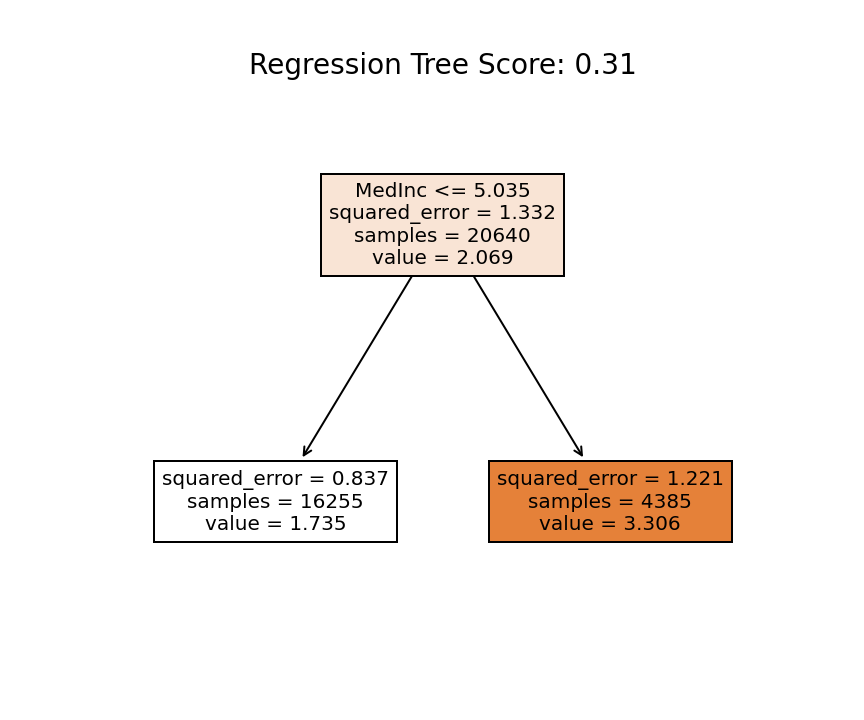
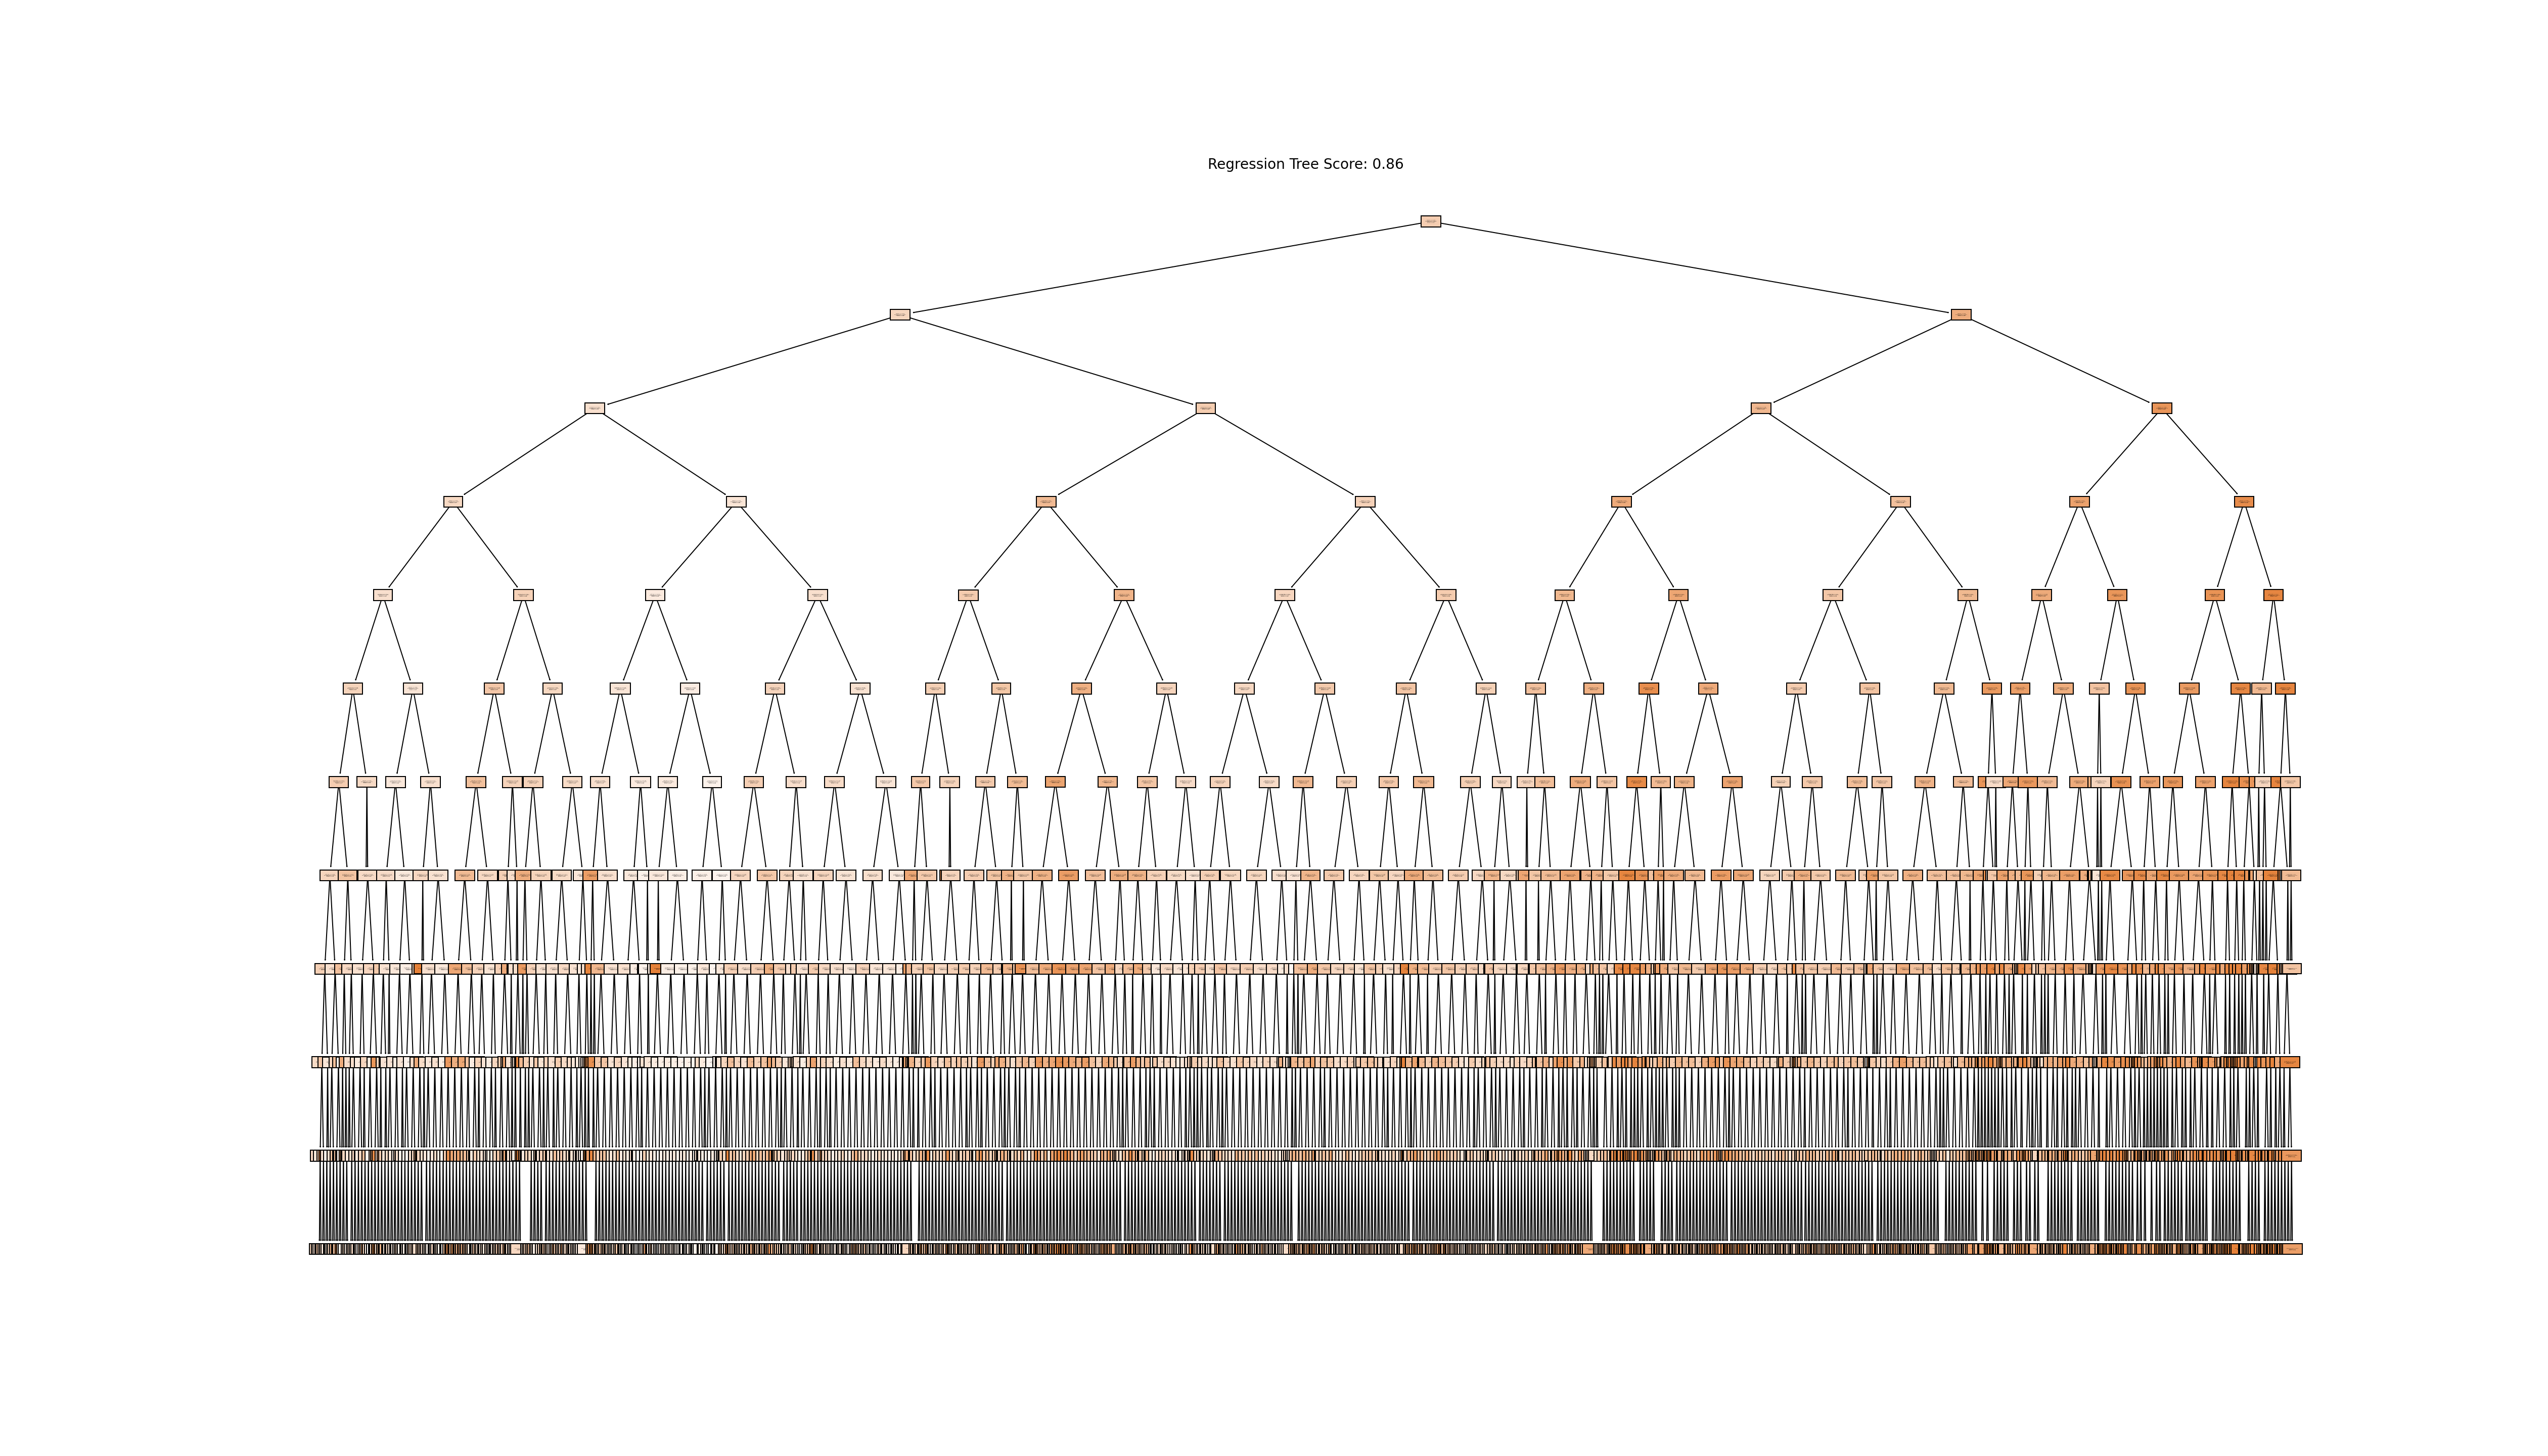
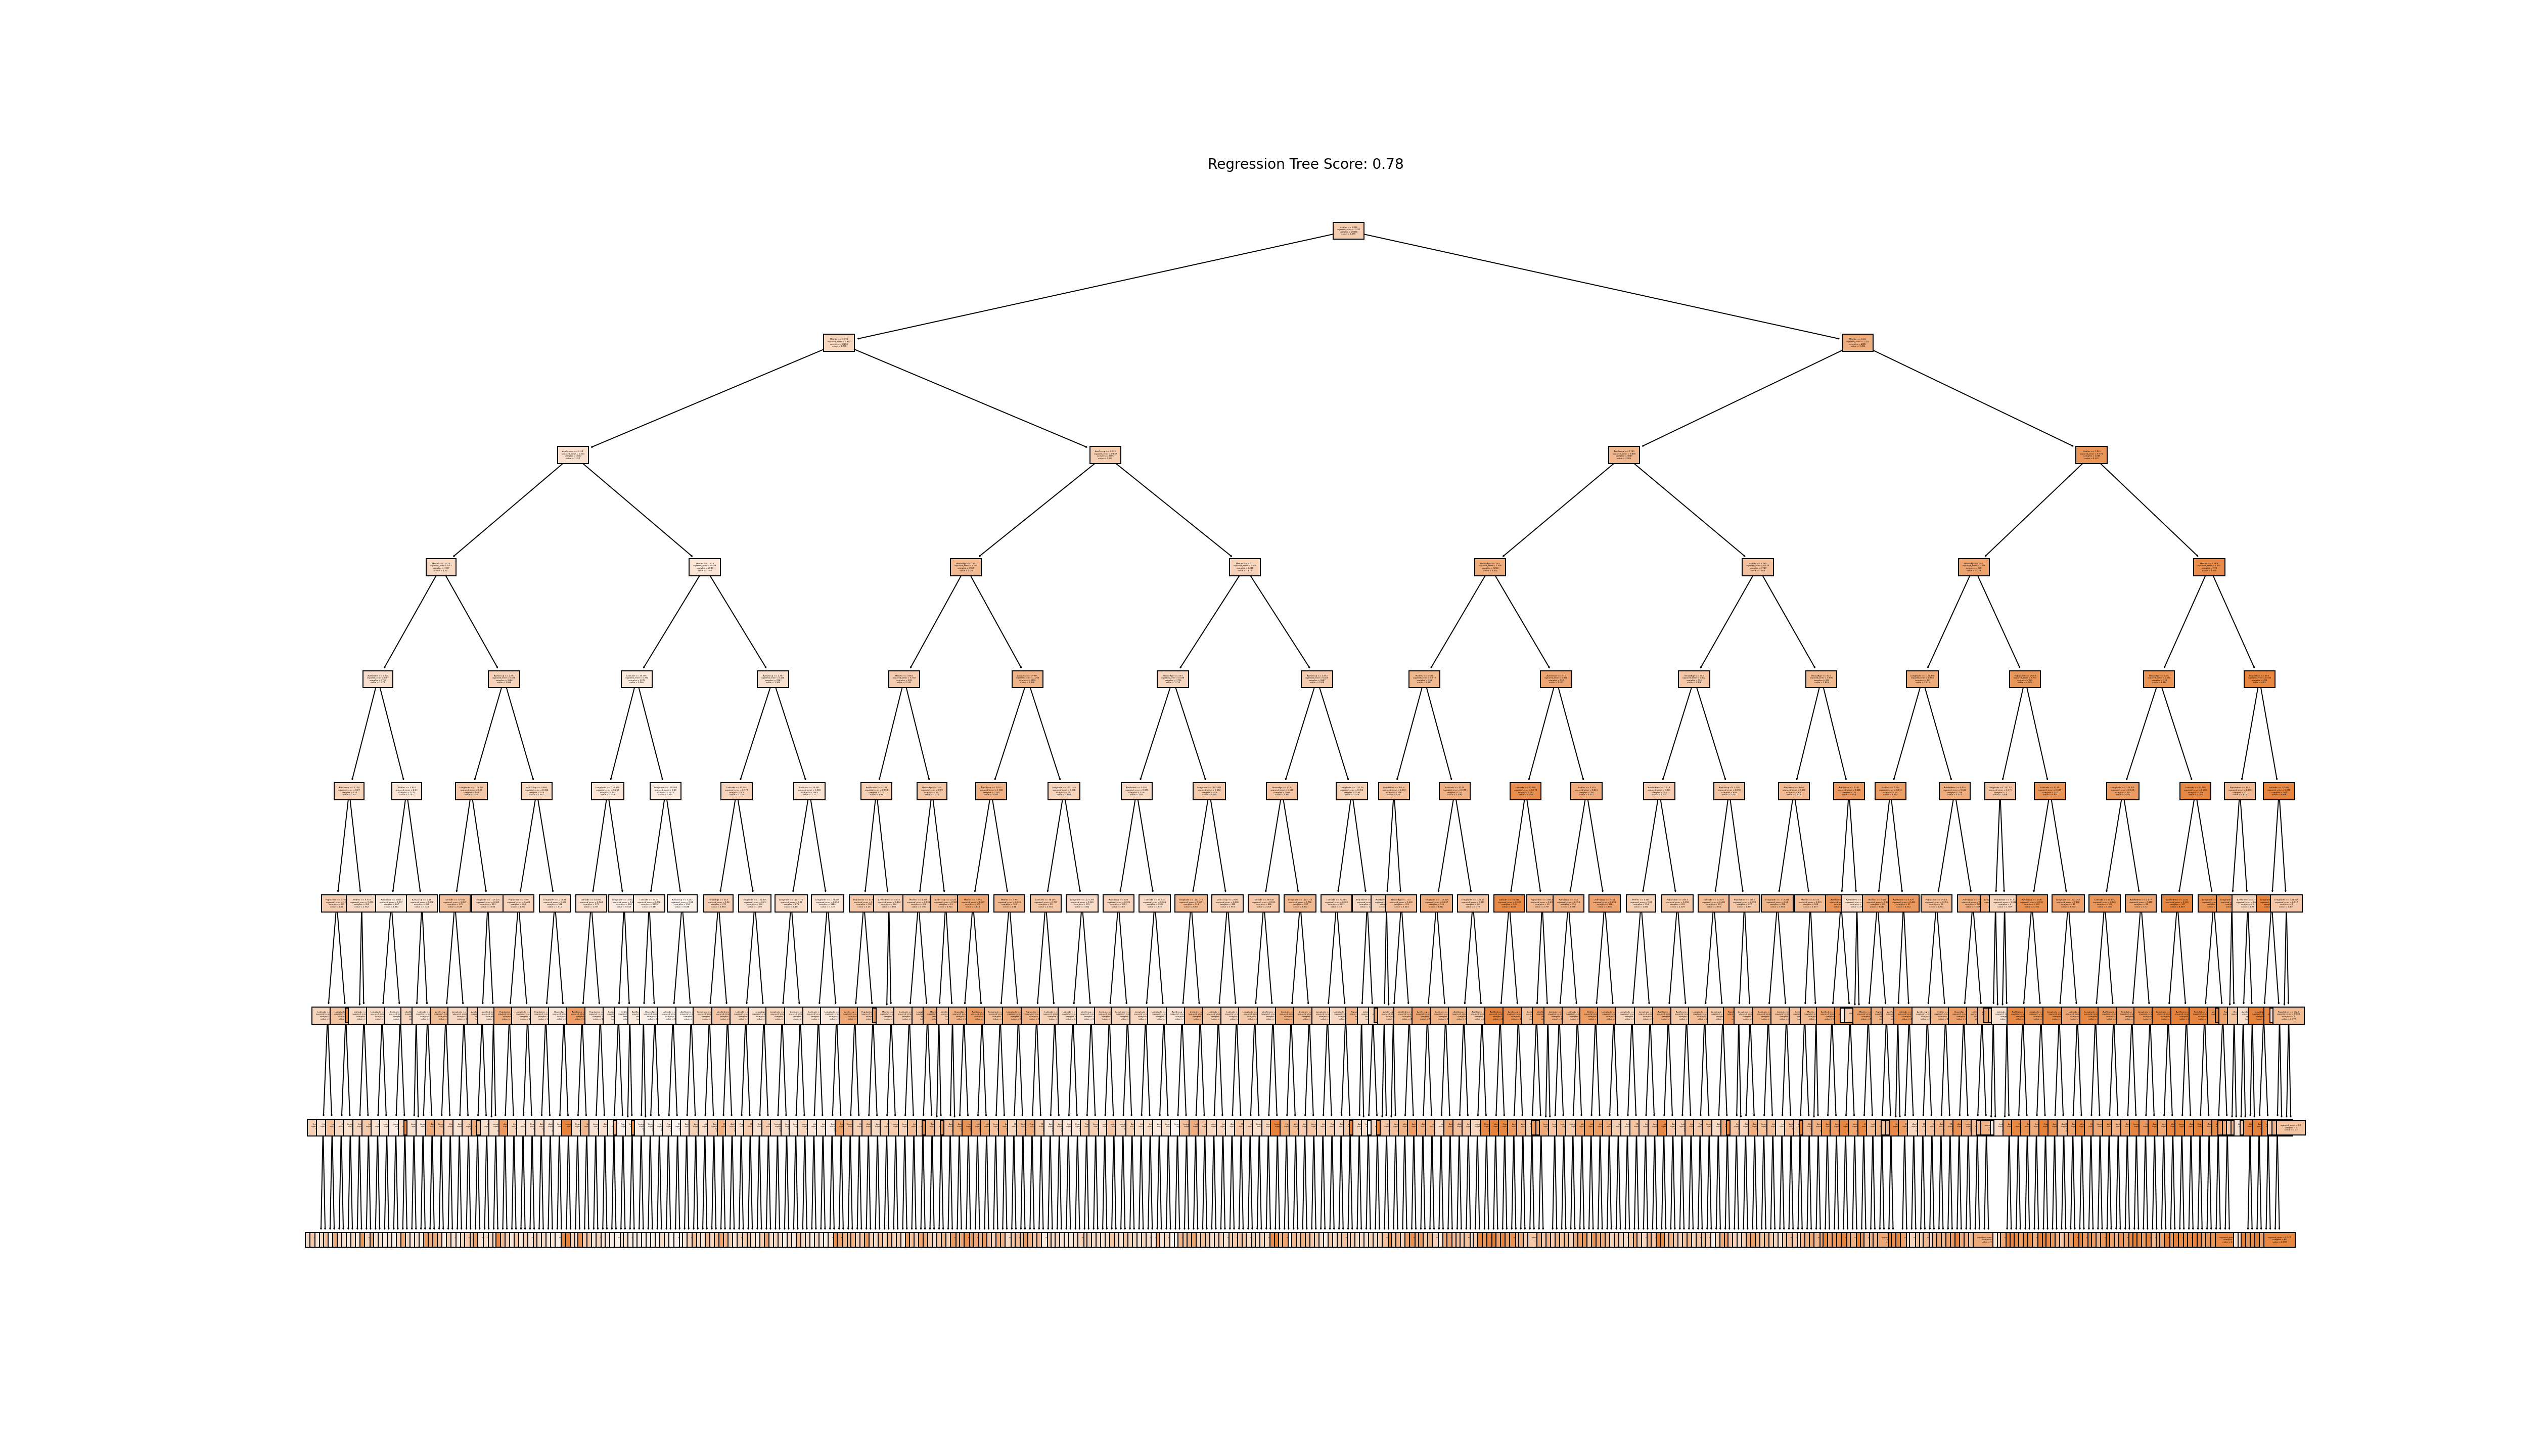
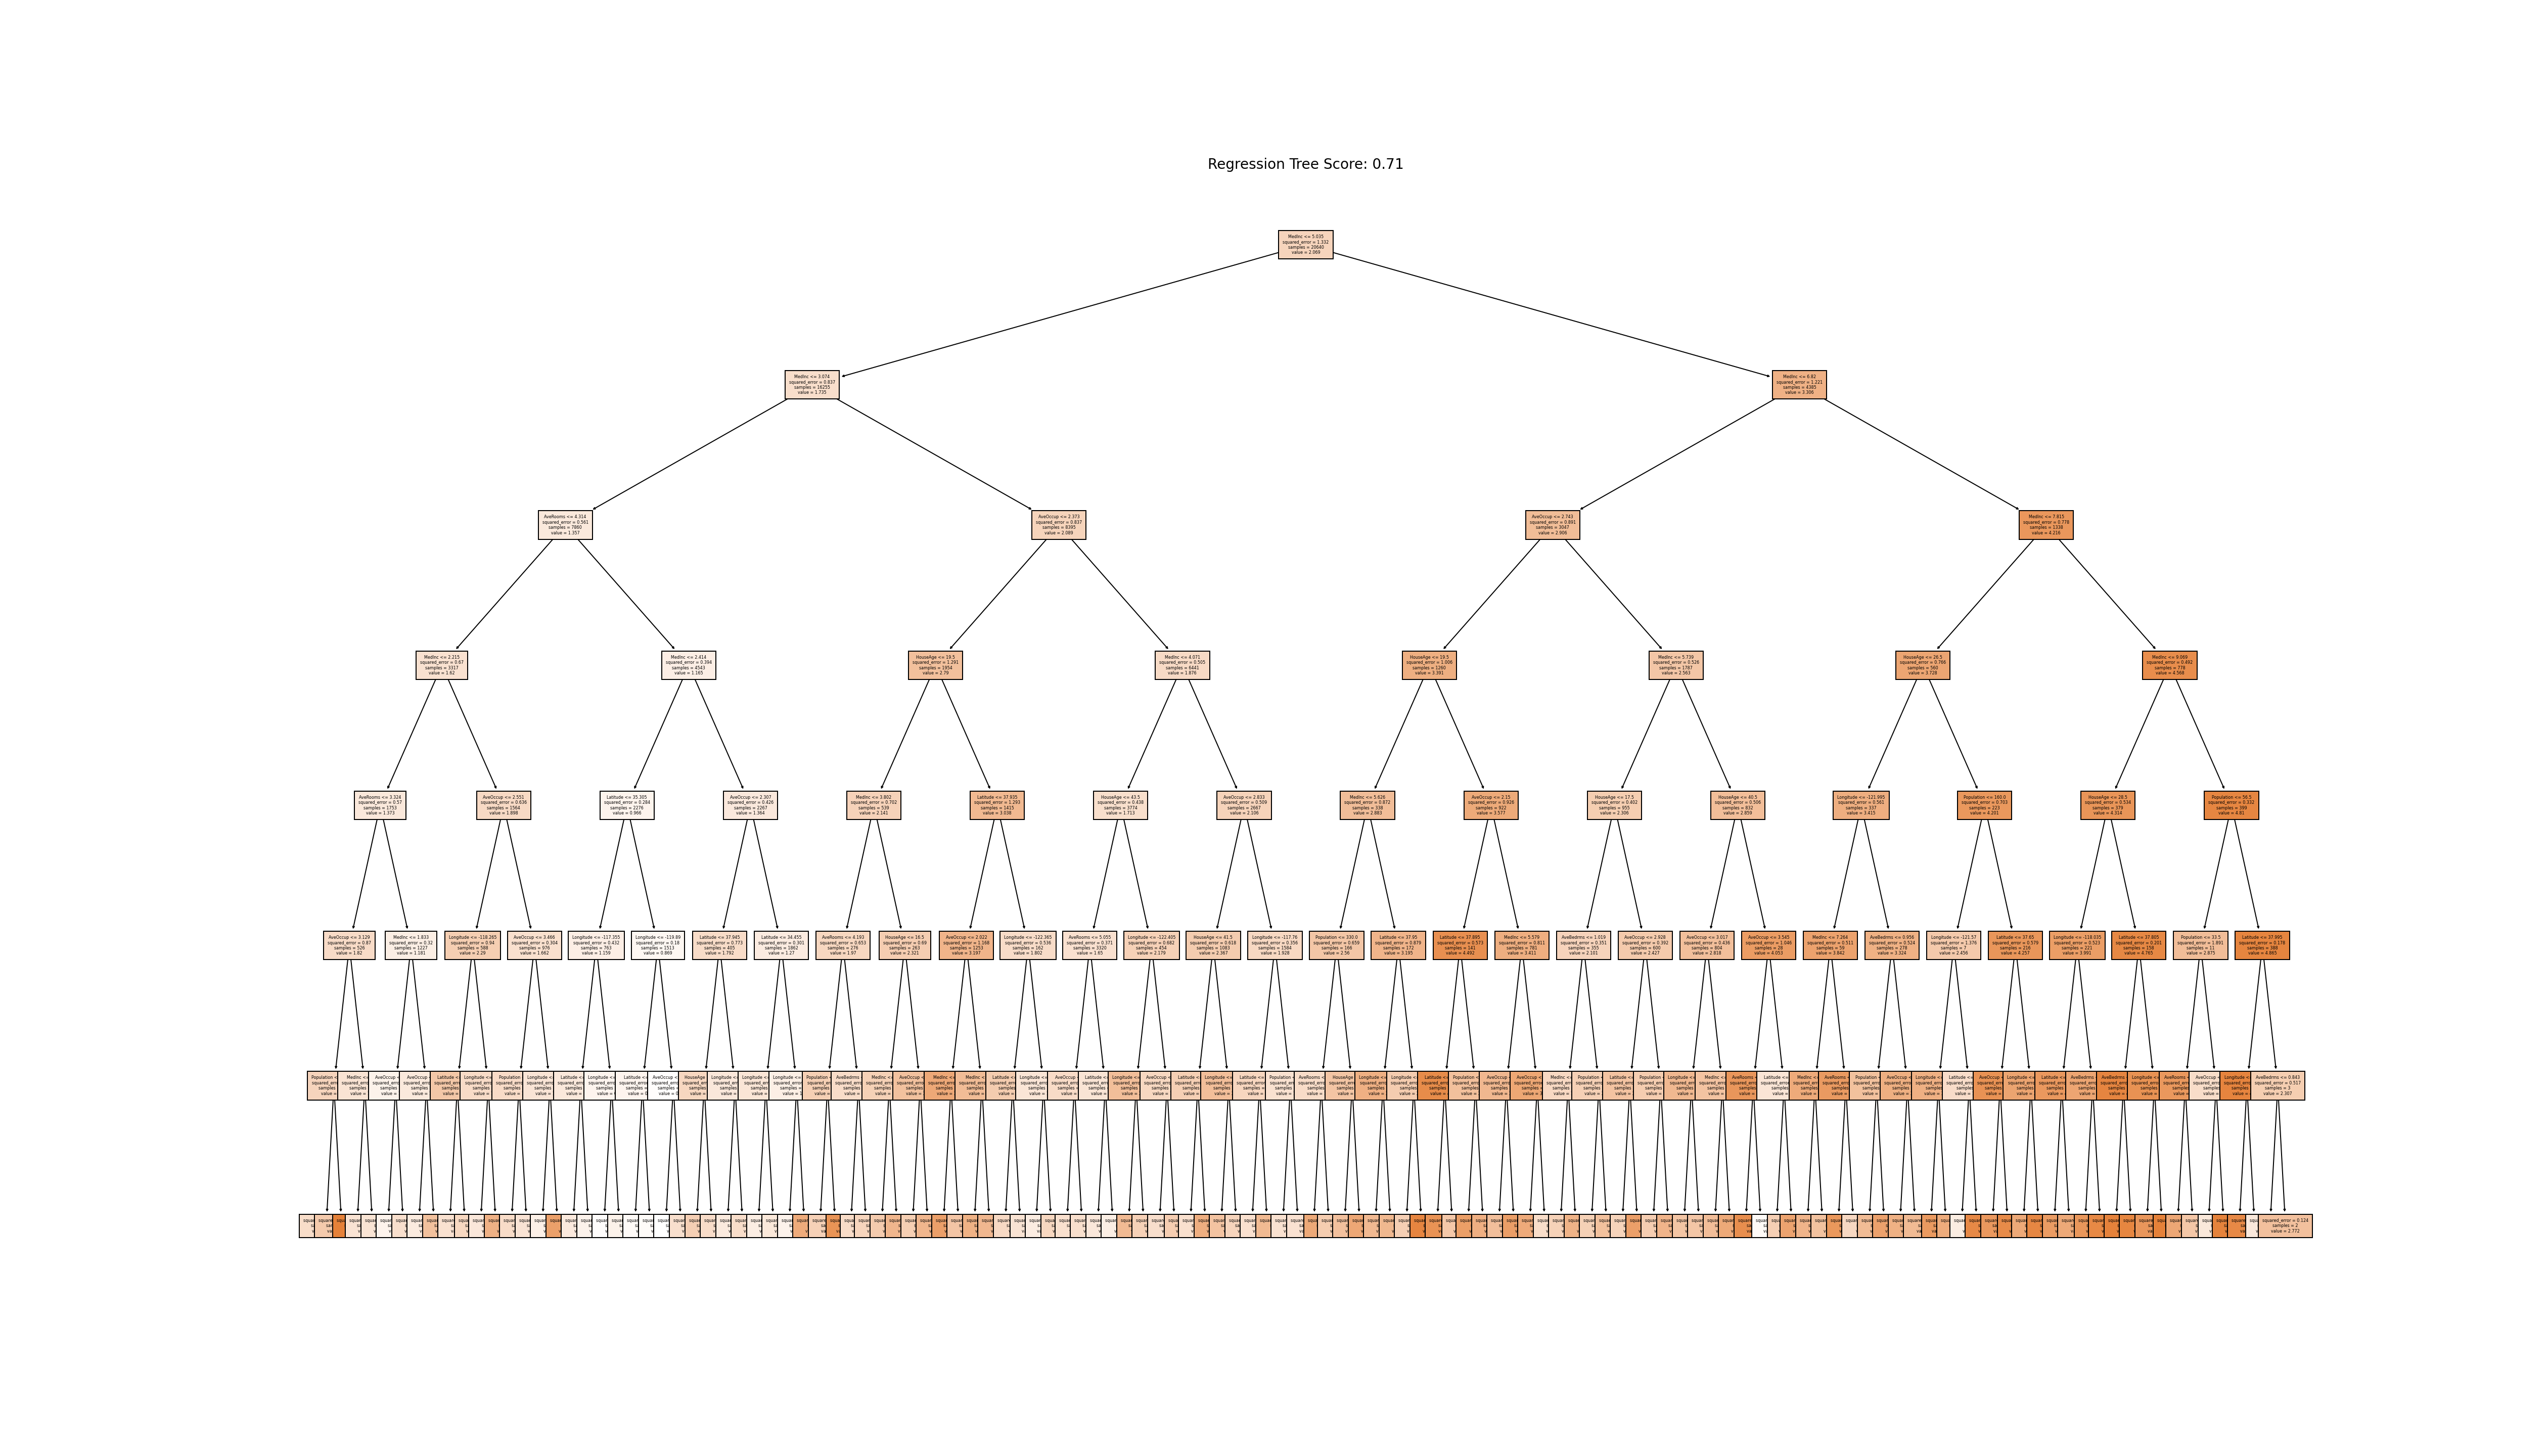
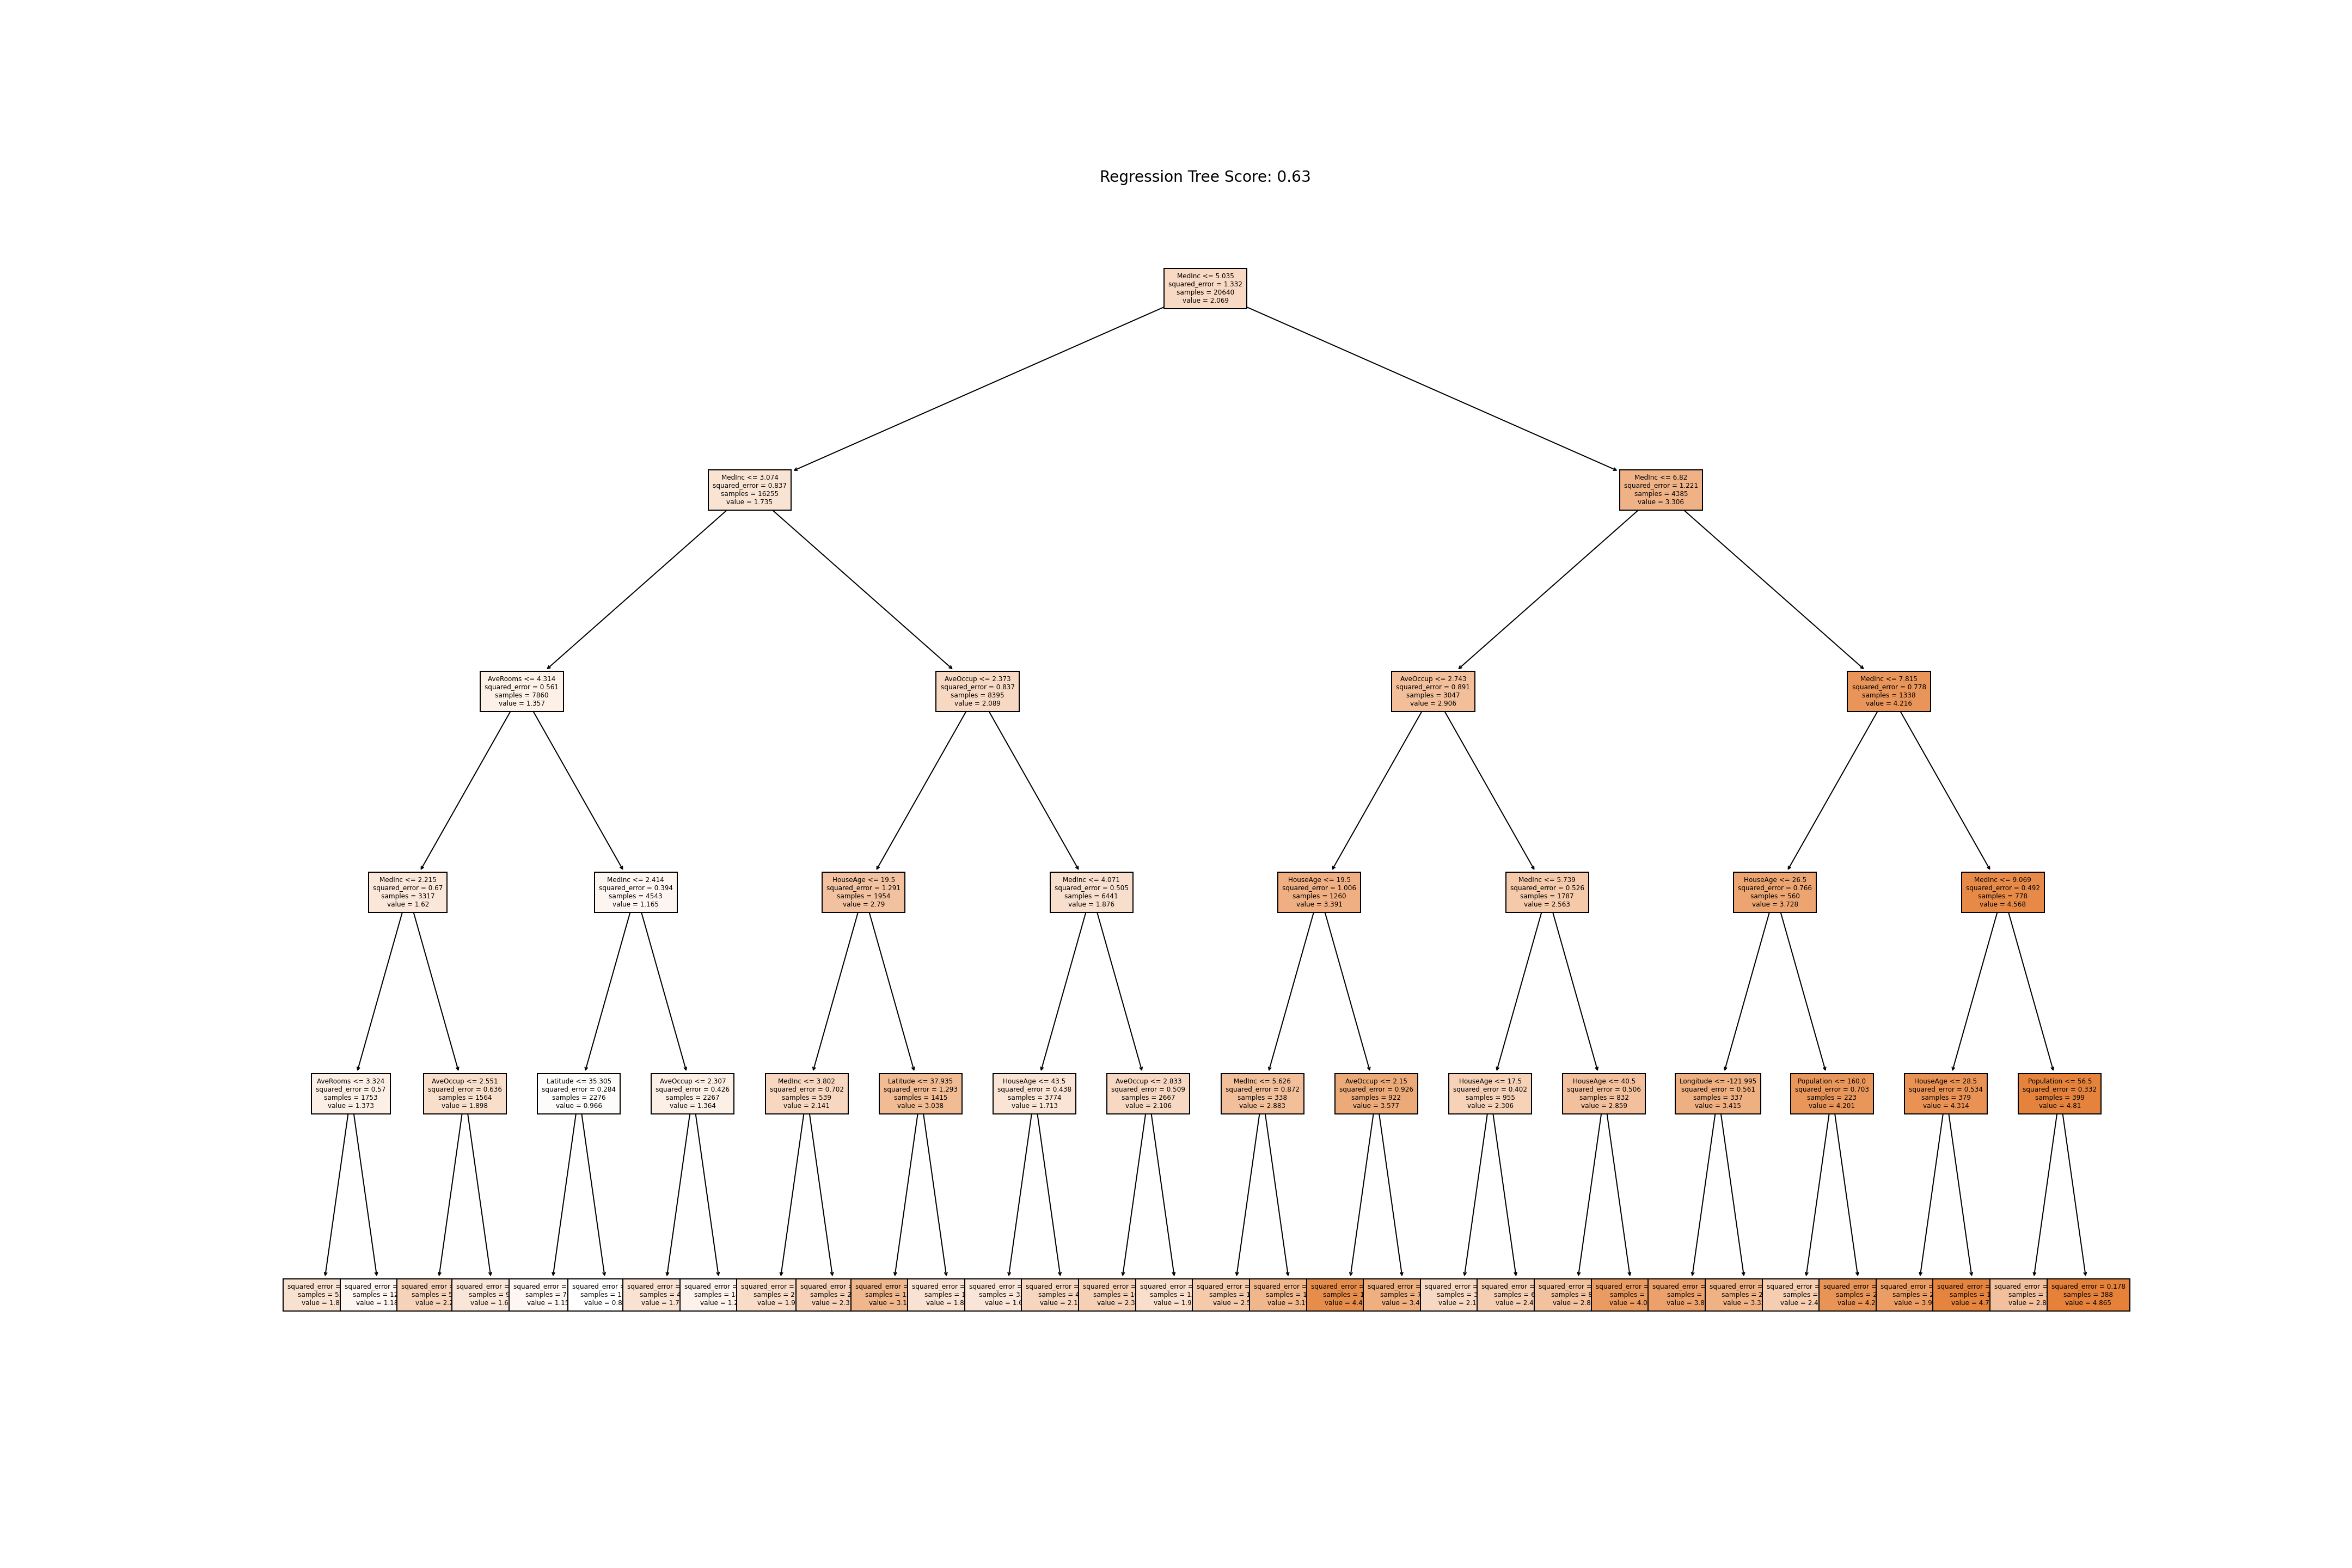
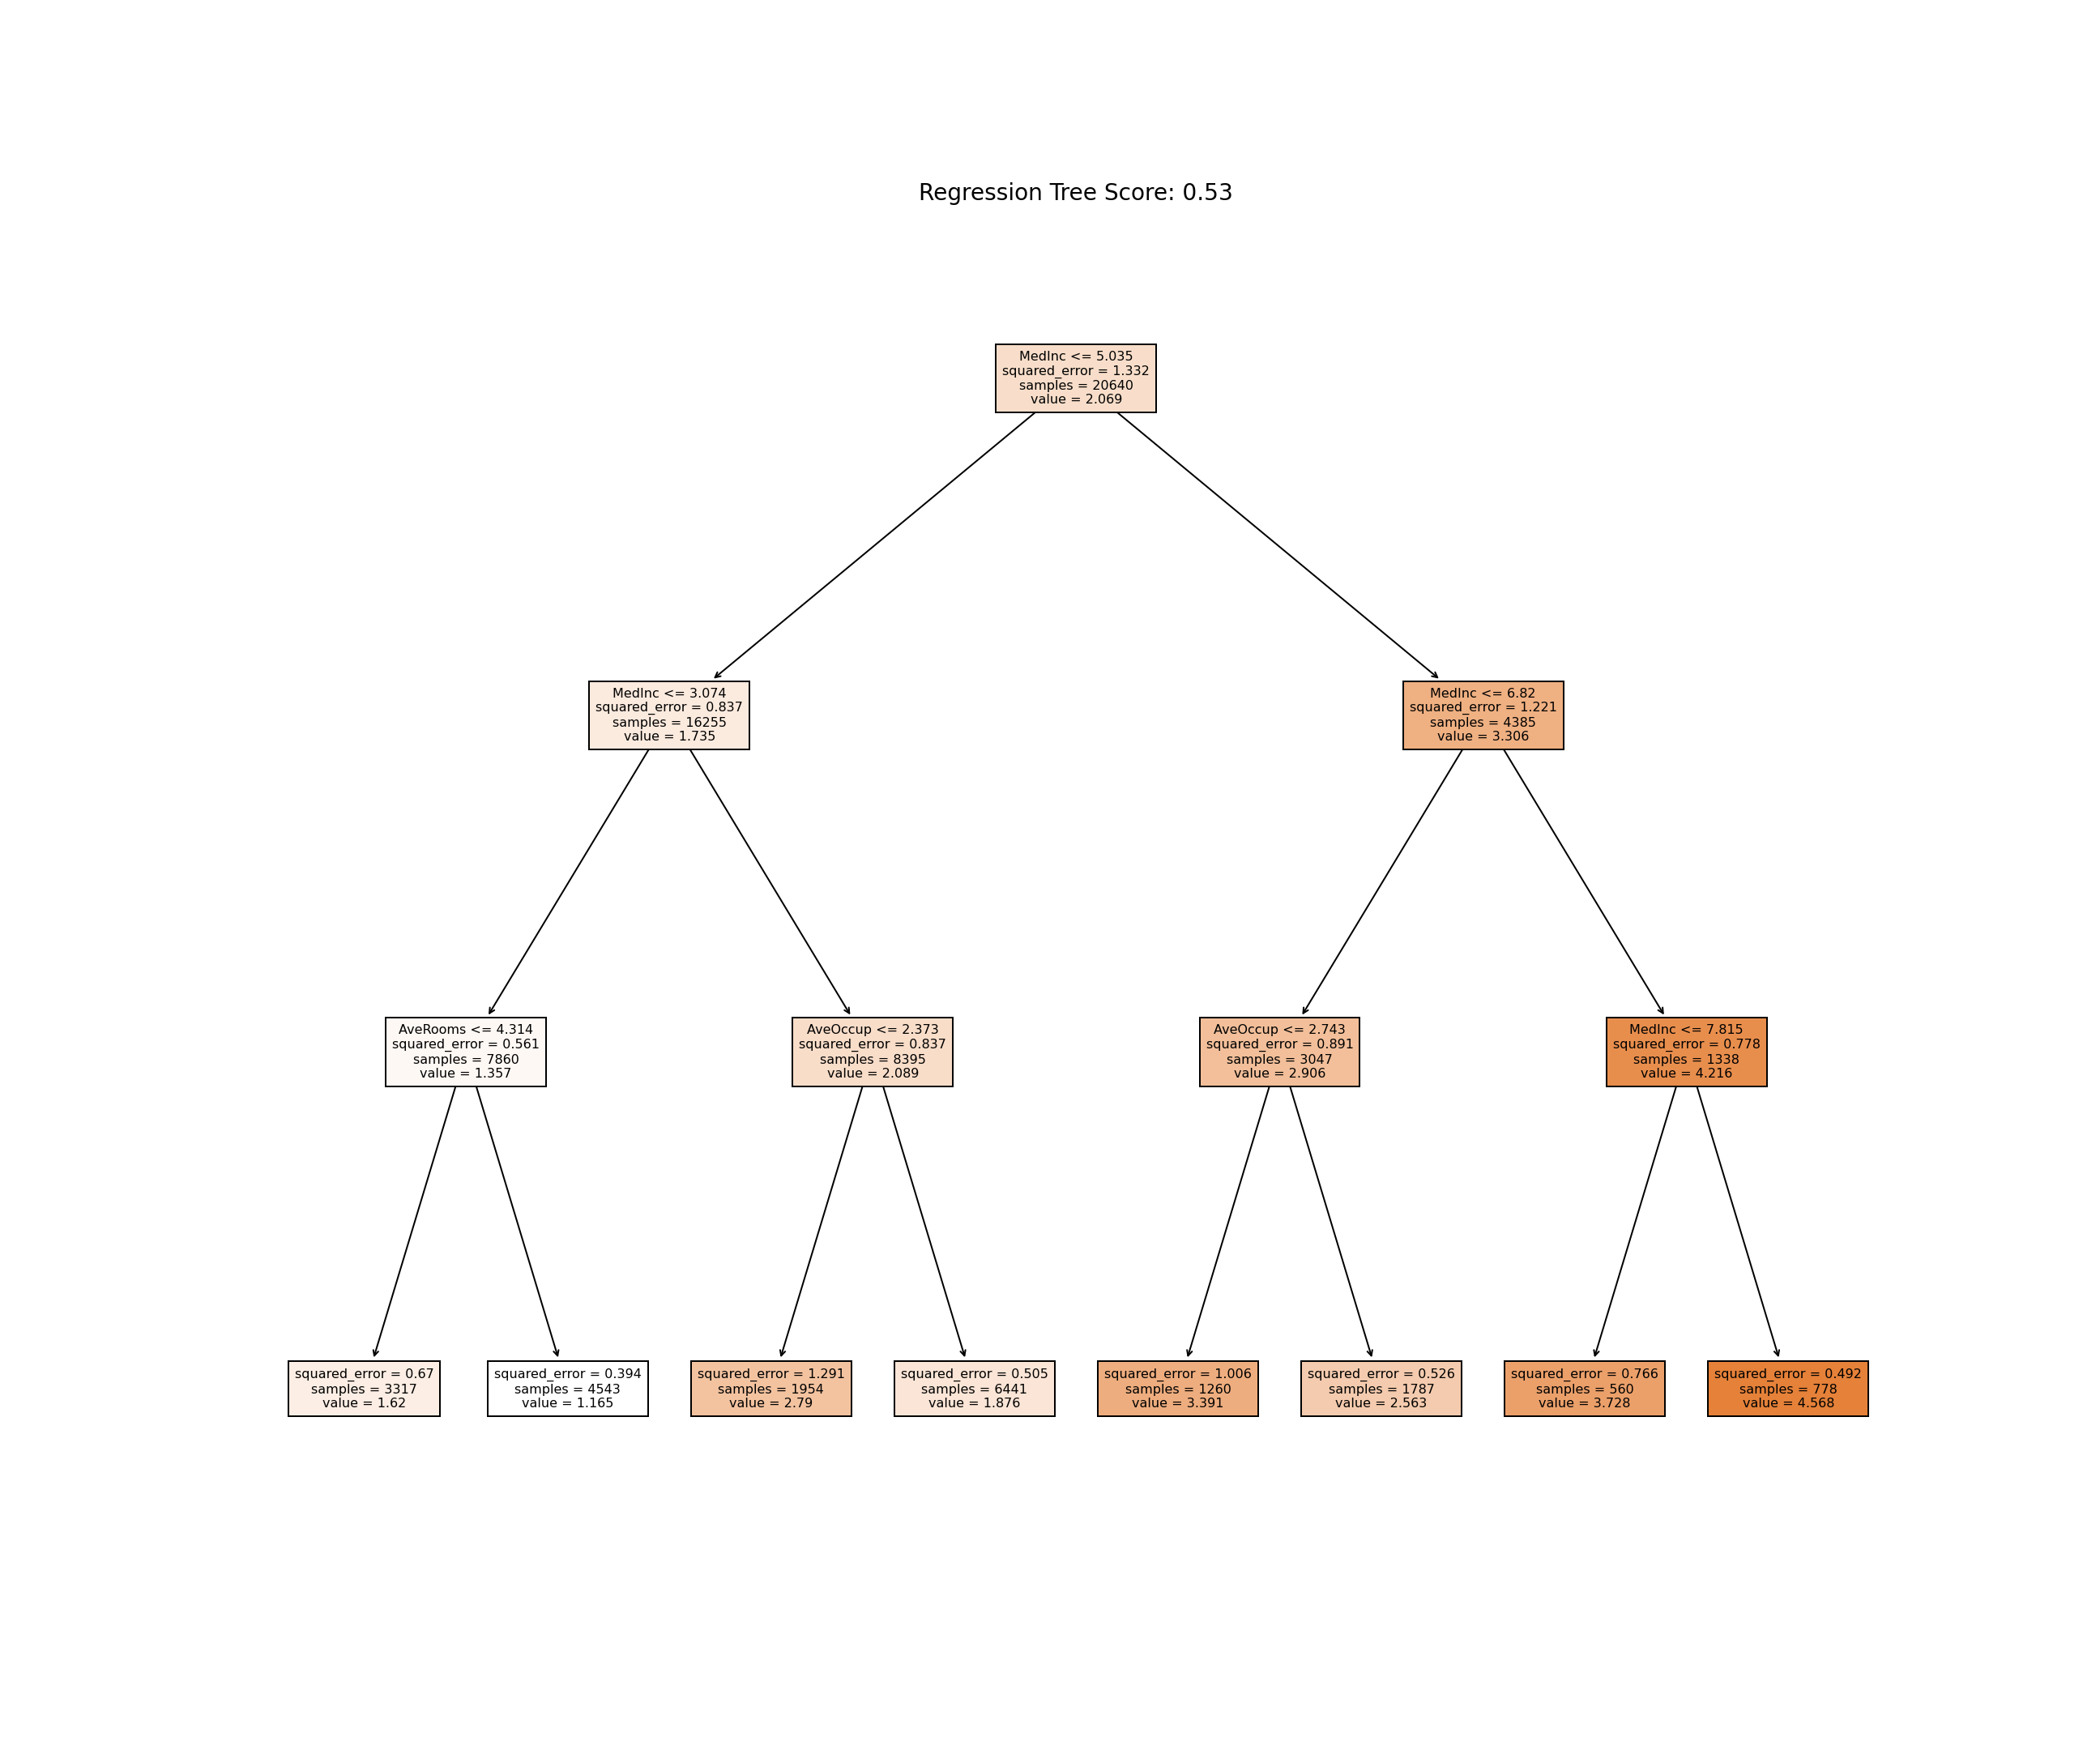
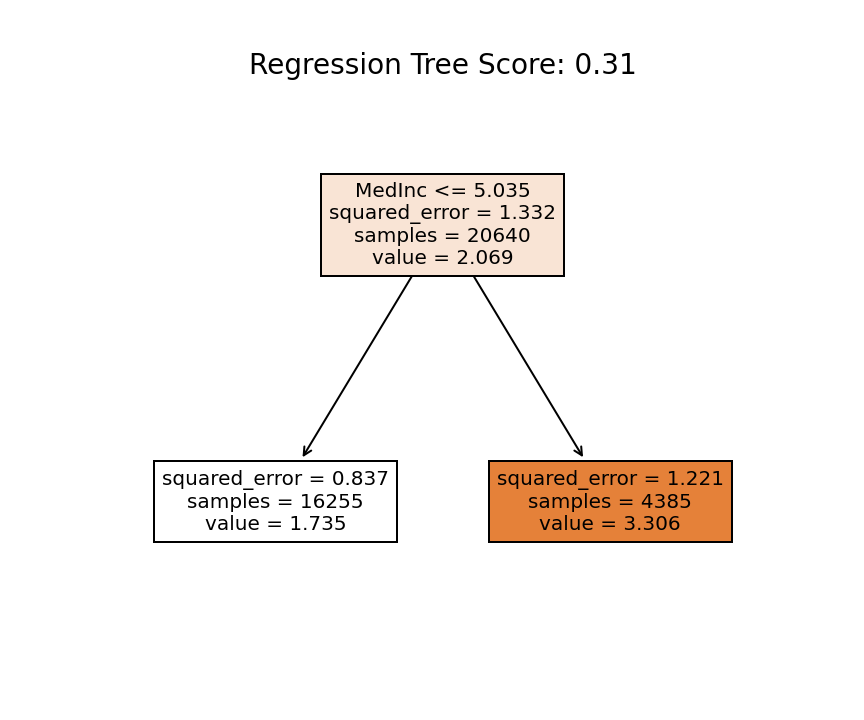

<Figure size 640x480 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 5040x2880 with 0 Axes>

<Figure size 5040x2880 with 0 Axes>

<Figure size 5040x2880 with 0 Axes>

<Figure size 4320x2880 with 0 Axes>

<Figure size 2592x2160 with 0 Axes>

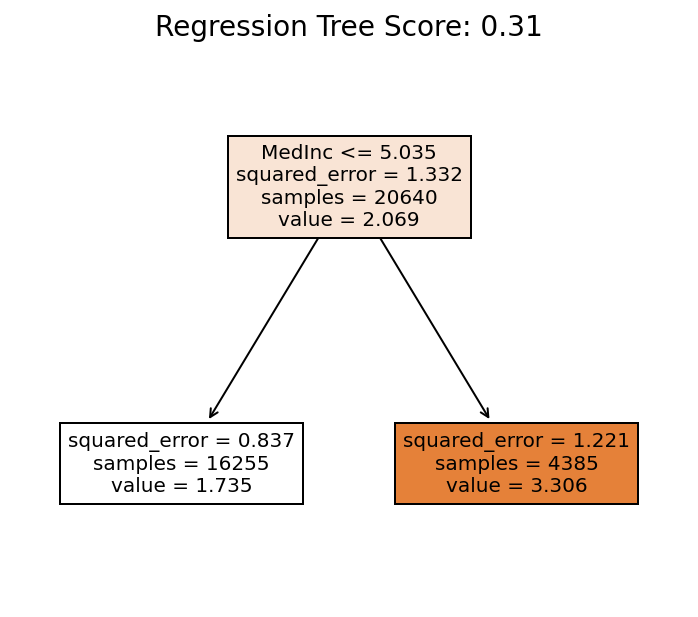

In [28]:
import panel as pn
from panel import widgets
from panel.interact import interact
import matplotlib

pn.extension()

from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing()
X_reg = cal.data
y_reg = cal.target

# Define a function to train a DecisionTreeRegressor with variable depth

def plot_depth_regression(depth):
    plt.clf()
    height_scale=5;width_scale=6
    reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg_tree.fit(X_reg, y_reg)
    score = reg_tree.score(X_reg, y_reg)
    width = min(35, depth * 6)
    height = min(20, depth * 5 )
    fontsize = 11 - depth
    fig = plt.figure(figsize=(width, height))    
    plot_tree(reg_tree, feature_names=cal['feature_names'], fontsize = fontsize, filled=True)
    plt.title(f"Regression Tree Score: {score:.2f}", fontsize=14)        
    return fig

depth_selector = pn.widgets.IntSlider(name='depth', start=1, end=10, value=1)
pn.interact(plot_depth_regression, depth=depth_selector).embed(max_opts=5)
#pn.interact(f, depth=depth_selector).embed(max_opts=10)

![](img/eva-well-done.png)